# 請結合前面的知識與程式碼，比較不同的 optimizer 與 learning rate 組合對訓練的結果與影響
### 常見的 optimizer 包含
* SGD
* RMSprop
* AdaGrad
* Adam

In [1]:
import os
import keras

# Disable GPU
os.environ["CUDA_VISIBLE_DEVICES"] = ""

Using TensorFlow backend.
C:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:526: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:527: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:528: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py

In [2]:
train, test = keras.datasets.cifar10.load_data()

In [3]:
## 資料前處理
def preproc_x(x, flatten=True):
    x = x / 255.
    if flatten:
        x = x.reshape((len(x), -1))
    return x

def preproc_y(y, num_classes=10):
    if y.shape[-1] == 1:
        y = keras.utils.to_categorical(y, num_classes)
    return y    

In [4]:
x_train, y_train = train
x_test, y_test = test

# Preproc the inputs
x_train = preproc_x(x_train)
x_test = preproc_x(x_test)

# Preprc the outputs
y_train = preproc_y(y_train)
y_test = preproc_y(y_test)

In [13]:
def build_mlp(input_shape, out_num = 10, num_neurons = [512, 256, 128]):
    """
    Build your own model
    """
    input_layer = keras.layers.Input(input_shape)
    
    for i, num_u in enumerate(num_neurons):
        if i == 0:
            x = keras.layers.Dense(units = num_u, activation = 'relu', name = 'hidden_layer_'+str(i+1))(input_layer)
        else:
            x = keras.layers.Dense(units = num_u, activation = 'relu', name = 'hidden_layer_'+str(i+1))(x)
    
    output_layer = keras.layers.Dense(units = 10, activation = 'softmax', name = 'output')(x)
    
    model = keras.models.Model(inputs = [input_layer], outputs = [output_layer])
    
    return model

In [14]:
## 超參數設定
"""
Set your required experiment parameters
"""
LEARN_RATE = [0.1, 0.01, 0.001]
EPOCHS = 50
BATCH_SIZE = 256
OPTIMIZER = ['SGD', 'Adam', 'RMSprop', 'AdaGrad']

In [22]:
results = {}
"""
建立你的訓練與實驗迴圈並蒐集資料
"""
for i, optima in enumerate(OPTIMIZER):
    keras.backend.clear_session()
    print("Build result for: ", optima)
    model = build_mlp(input_shape = x_train.shape[1:])
    model.summary()
    model.compile(loss = 'categorical_crossentropy', metrics = ['accuracy'], optimizer = optima)
    model.fit(x_train, y_train, epochs = EPOCHS, batch_size = BATCH_SIZE,
              validation_data = (x_test, y_test), shuffle = True)
    
    train_loss = model.history.history['loss']
    valid_loss = model.history.history['val_loss']
    train_acc = model.history.history['acc']
    valid_acc = model.history.history['val_acc']
    
    exp_name_tag = 'exp_optima-%s' % optima
    results[exp_name_tag] = {
        'train-loss': train_loss,
        'val-loss': valid_loss,
        'train-acc': train_acc,
        'val-acc': valid_acc}
    

Build result for:  SGD
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer_1 (Dense)       (None, 512)               1573376   
_________________________________________________________________
hidden_layer_2 (Dense)       (None, 256)               131328    
_________________________________________________________________
hidden_layer_3 (Dense)       (None, 128)               32896     
_________________________________________________________________
output (Dense)               (None, 10)                1290      
Total params: 1,738,890
Trainable params: 1,738,890
Non-trainable params: 0
_________________________________________________________________
Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [==============================] - 7

Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [==============================] - 11s 214us/step - loss: 1.9003 - acc: 0.3167 - val_loss: 1.7577 - val_acc: 0.3620
Epoch 2/50
50000/50000 [==============================] - 10s 200us/step - loss: 1.6959 - acc: 0.3950 - val_loss: 1.6617 - val_acc: 0.4077
Epoch 3/50
50000/50000 [==============================] - 10s 199us/step - loss: 1.6056 - acc: 0.4285 - val_loss: 1.5642 - val_acc: 0.4481
Epoch 4/50
50000/50000 [==============================] - 10s 200us/step - loss: 1.5405 - acc: 0.4512 - val_loss: 1.5141 - val_acc: 0.4594
Epoch 5/50
50000/50000 [==============================] - 10s 201us/step - loss: 1.5052 - acc: 0.4647 - val_loss: 1.5283 - val_acc: 0.4515
Epoch 6/50
50000/50000 [==============================] - 10s 197us/step - loss: 1.4563 - acc: 0.4819 - val_loss: 1.4751 - val_acc: 0.4755
Epoch 7/50
50000/50000 [==============================] - 10s 201us/step - loss: 1.4318 - acc: 0.4910 - val_loss: 1.

50000/50000 [==============================] - 9s 185us/step - loss: 2.2698 - acc: 0.2154 - val_loss: 1.9304 - val_acc: 0.2997
Epoch 2/50
50000/50000 [==============================] - 9s 173us/step - loss: 1.8887 - acc: 0.3172 - val_loss: 1.7563 - val_acc: 0.3625
Epoch 3/50
50000/50000 [==============================] - 9s 175us/step - loss: 1.7864 - acc: 0.3565 - val_loss: 1.8810 - val_acc: 0.3410
Epoch 4/50
50000/50000 [==============================] - 9s 173us/step - loss: 1.7202 - acc: 0.3807 - val_loss: 1.7255 - val_acc: 0.3642
Epoch 5/50
50000/50000 [==============================] - 9s 172us/step - loss: 1.6611 - acc: 0.4065 - val_loss: 1.8087 - val_acc: 0.3557
Epoch 6/50
50000/50000 [==============================] - 9s 173us/step - loss: 1.6206 - acc: 0.4204 - val_loss: 1.7032 - val_acc: 0.3803
Epoch 7/50
50000/50000 [==============================] - 9s 184us/step - loss: 1.5769 - acc: 0.4367 - val_loss: 1.6862 - val_acc: 0.3941
Epoch 8/50
50000/50000 [=====================

50000/50000 [==============================] - 8s 151us/step - loss: 14.5061 - acc: 0.1000 - val_loss: 14.5061 - val_acc: 0.1000
Epoch 3/50
50000/50000 [==============================] - 8s 155us/step - loss: 14.5108 - acc: 0.0995 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 4/50
50000/50000 [==============================] - 8s 157us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 5/50
50000/50000 [==============================] - 8s 169us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 6/50
50000/50000 [==============================] - 8s 166us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 7/50
50000/50000 [==============================] - 8s 170us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 8/50
50000/50000 [==============================] - 8s 158us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 9/50
50000/50000 [=======

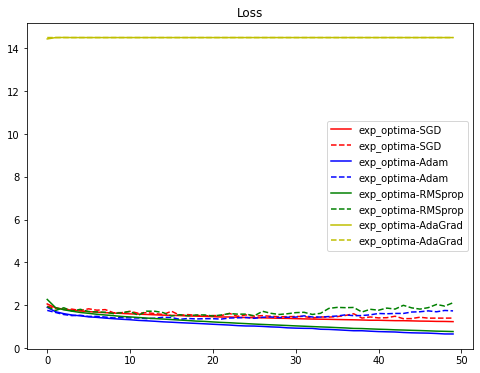

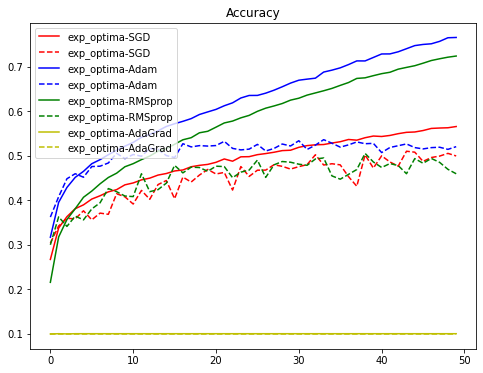

In [23]:
import matplotlib.pyplot as plt
%matplotlib inline

"""
將實驗結果繪出
"""
color_bar = ['r', 'b', 'g', 'y', 'm', 'k']
plt.figure(figsize = (8, 6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-loss'])), results[cond]['train-loss'], '-', label = cond, color = color_bar[i])
    plt.plot(range(len(results[cond]['val-loss'])), results[cond]['val-loss'], '--', label = cond, color = color_bar[i])
plt.title('Loss')
plt.legend()
plt.show()

plt.figure(figsize = (8, 6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-acc'])), results[cond]['train-acc'], '-', label = cond, color = color_bar[i])
    plt.plot(range(len(results[cond]['val-acc'])), results[cond]['val-acc'], '--', label = cond, color = color_bar[i])
plt.title('Accuracy')
plt.legend()
plt.show()
